### Laboratorio 6 - DS

Alejandra Guzm√°n 20262

Jorge Caballeros 20009

In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

def clean_text(text):

    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    stop_words = set(stopwords.words('spanish'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    text = text.encode('ascii', 'ignore').decode('ascii')
    
    return text


bernardo_arevalo_df = pd.read_csv('bernardoArevalo.csv')
sandra_torres_df = pd.read_csv('sandraTorres.csv')
trafico_gt_df = pd.read_csv('traficogt.csv')


bernardo_arevalo_df['cleanedContent'] = bernardo_arevalo_df['rawContent'].apply(clean_text)
sandra_torres_df['cleanedContent'] = sandra_torres_df['rawContent'].apply(clean_text)


bernardo_arevalo_head = bernardo_arevalo_df.head()
sandra_torres_head = sandra_torres_df.head()
trafico_gt_head = trafico_gt_df.head()

sample_cleaned_tweets_bernardo = bernardo_arevalo_df['cleanedContent'].sample(5)
sample_cleaned_tweets_sandra = sandra_torres_df['cleanedContent'].sample(5)

bernardo_arevalo_head, sandra_torres_head, trafico_gt_head, sample_cleaned_tweets_bernardo, sample_cleaned_tweets_sandra


(   Unnamed: 0                   id               id_str  \
 0           0  1702109621899407575  1702109621899407575   
 1           1  1702109505947865192  1702109505947865192   
 2           2  1701995859229958189  1701995859229958189   
 3           3  1702109134387134664  1702109134387134664   
 4           4  1702108943495926143  1702108943495926143   
 
                                                  url  \
 0  https://twitter.com/eltuitdehoy_/status/170210...   
 1  https://twitter.com/totitafuentes/status/17021...   
 2  https://twitter.com/DrDavidCabrera/status/1701...   
 3  https://twitter.com/Fernand0483/status/1702109...   
 4  https://twitter.com/MaxTiger502/status/1702108...   
 
                         date  \
 0  2023-09-13 23:58:52+00:00   
 1  2023-09-13 23:58:24+00:00   
 2  2023-09-13 16:26:49+00:00   
 3  2023-09-13 23:56:55+00:00   
 4  2023-09-13 23:56:10+00:00   
 
                                                 user lang  \
 0  {'id': 46561608, 'id_str': '

In [2]:

trafico_gt_df.describe(include='all')


Unnamed: 0            id        id_str  \
count   12631.00000  1.263100e+04  1.263100e+04   
unique          NaN           NaN           NaN   
top             NaN           NaN           NaN   
freq            NaN           NaN           NaN   
mean     6315.00000  1.541871e+18  1.541871e+18   
std      3646.39996  2.016253e+17  2.016253e+17   
min         0.00000  2.837328e+17  2.837328e+17   
25%      3157.50000  1.353746e+18  1.353746e+18   
50%      6315.00000  1.693984e+18  1.693984e+18   
75%      9472.50000  1.700314e+18  1.700314e+18   
max     12630.00000  1.702402e+18  1.702402e+18   

                                                      url  \
count                                               12631   
unique                                               9963   
top     https://twitter.com/TSEGuatemala/status/169516...   
freq                                                   12   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                             date  \
count                       12631   
unique                       9851   
top     2023-09-12 01:46:10+00:00   
freq                           16   
mean                          NaN   
std                           NaN   
min                           NaN   
25%                           NaN   
50%                           NaN   
75%                           NaN   
max                           NaN   

                                                     user   lang  \
count                                               12631  12631   
unique                                               4789     21   
top     {'id': 2491899726, 'id_str': '2491899726', 'ur...     es   
freq                                                  194  11946   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN   
25%                                                   NaN    NaN   
50%                                                   NaN    NaN   
75%                                                   NaN    NaN   
max                                                   NaN    NaN   

                                               rawContent    replyCount  \
count                                               12631  12631.000000   
unique                                               9827           NaN   
top     If you own a mouse, you will never turn off yo...           NaN   
freq                                                   38           NaN   
mean                                                  NaN     19.145594   
std                                                   NaN    217.571265   
min                                                   NaN      0.000000   
25%                                                   NaN      0.000000   
50%                                                   NaN      0.000000   
75%                                                   NaN      1.000000   
max                                                   NaN   8611.000000   

        retweetCount  ...                                        quotedTweet  \
count   12631.000000  ...                                                926   
unique           NaN  ...                                                566   
top              NaN  ...  {'id': 1695182059004666181, 'id_str': '1695182...   
freq             NaN  ...                                                 17   
mean       40.664476  ...                                                NaN   
std       473.150980

- Los tweets provienen de 42 fuentes √∫nicas, siendo "Twitter for Android" la m√°s com√∫n.
- Hay 4,789 usuarios √∫nicos que han tuiteado sobre el tr√°fico.

In [3]:

rain_keywords = ["lluvia", "aguacero", "inundaci√≥n", "anegaci√≥n", "deslave"]
sinkhole_keywords = ["socav√≥n", "zona 5", "universidad", "hundimiento"]

rain_mentions = trafico_gt_df[trafico_gt_df['rawContent'].str.contains('|'.join(rain_keywords), case=False, na=False)]
sinkhole_mentions = trafico_gt_df[trafico_gt_df['rawContent'].str.contains('|'.join(sinkhole_keywords), case=False, na=False)]

len(rain_mentions), len(sinkhole_mentions)


(158, 169)

- Hay 158 menciones relacionadas con la √©poca de lluvia en los datos de tr√°fico de la ciudad de Guatemala.
- Hay 169 menciones relacionadas con el socav√≥n de la zona 5 y la universidad.

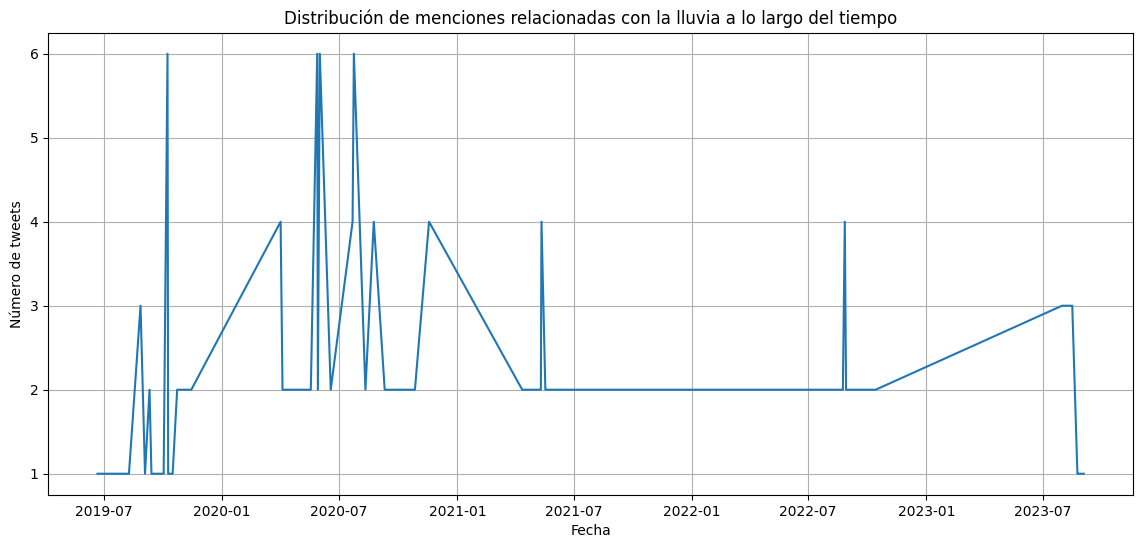

In [4]:
import matplotlib.pyplot as plt


trafico_gt_df['date'] = pd.to_datetime(trafico_gt_df['date'])

rain_mentions = trafico_gt_df[trafico_gt_df['rawContent'].str.contains('|'.join(rain_keywords), case=False, na=False)]

rain_mentions_by_date = rain_mentions.groupby(trafico_gt_df['date'].dt.date).size()

plt.figure(figsize=(14, 6))
rain_mentions_by_date.plot()
plt.title("Distribuci√≥n de menciones relacionadas con la lluvia a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("N√∫mero de tweets")
plt.grid(True)
plt.show()


El gr√°fico muestra la distribuci√≥n de menciones relacionadas con la lluvia a lo largo del tiempo. A continuaci√≥n, algunos puntos clave:

- Observamos varios picos, lo que podr√≠a indicar d√≠as espec√≠ficos en los que la lluvia afect√≥ significativamente el tr√°fico en la ciudad de Guatemala.
- Estos picos pueden estar asociados con eventos clim√°ticos m√°s intensos, como fuertes aguaceros o inundaciones que complicaron la movilidad.
- Para tener una mejor idea de c√≥mo la lluvia ha complicado el tr√°fico en la ciudad, podemos observar algunos de los tweets de los d√≠as con los picos m√°s altos.

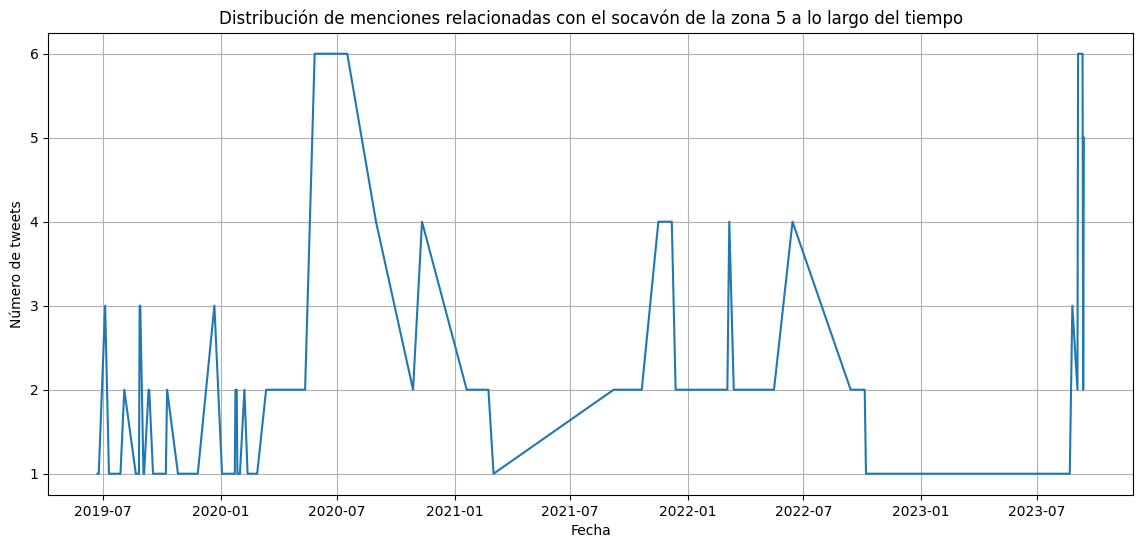

In [5]:

sinkhole_mentions = trafico_gt_df[trafico_gt_df['rawContent'].str.contains('|'.join(sinkhole_keywords), case=False, na=False)]

sinkhole_mentions_by_date = sinkhole_mentions.groupby(trafico_gt_df['date'].dt.date).size()

plt.figure(figsize=(14, 6))
sinkhole_mentions_by_date.plot()
plt.title("Distribuci√≥n de menciones relacionadas con el socav√≥n de la zona 5 a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("N√∫mero de tweets")
plt.grid(True)
plt.show()


- Hay varios picos evidentes en el gr√°fico, lo que podr√≠a indicar momentos espec√≠ficos en los que el socav√≥n de la zona 5 tuvo un impacto significativo en el tr√°fico, especialmente cerca de la universidad.
- Estos picos pueden estar asociados con eventos o desarrollos relacionados con el socav√≥n, como su formaci√≥n inicial, trabajos de reparaci√≥n, o situaciones adicionales que podr√≠an haber afectado el flujo de tr√°fico.

In [6]:

top_sinkhole_dates = sinkhole_mentions_by_date.nlargest(5).index
sample_sinkhole_tweets = sinkhole_mentions[sinkhole_mentions['date'].dt.date.isin(top_sinkhole_dates)].sample(10)

sample_sinkhole_tweets[['date', 'rawContent']]

date  \
6088  2020-07-17 17:01:30+00:00   
6188  2020-05-27 13:22:32+00:00   
6004  2023-09-11 17:26:08+00:00   
6091  2020-07-17 14:46:12+00:00   
30    2023-09-04 02:43:51+00:00   
6000  2023-09-11 15:12:25+00:00   
12428 2020-05-27 13:22:32+00:00   
12218 2020-07-17 16:03:10+00:00   
2429  2023-09-04 02:43:51+00:00   
12217 2020-07-17 17:01:30+00:00   

                                              rawContent  
6088   #Comunidad üë•  | Unidad de Poda - Limpia / Verd...  
6188   Derrumbe en ruta El Atl√°ntico, √°rbol ca√≠do en ...  
6004   @GersonGudielCas @jmdoughertys @IGSS_gt @BArev...  
6091   #Tr√°ficoGT | @amilcarmontejo informa sobre que...  
30     #MuniGuate informa.\n\n‚õîÔ∏èüöß CIERRE TEMPORAL DE ...  
6000   JUAN JOS√â AR√âVALO BERMEJO\n\nJuan Jos√© Ar√©valo...  
12428  Derrumbe en ruta El Atl√°ntico, √°rbol ca√≠do en ...  
12218  #√öltimaHora | @amilcarmontejo informa sobre bl...  
2429   #MuniGuate informa.\n\n‚õîÔ∏èüöß CIERRE TEMPORAL DE ...  
12217  #Comunidad üë•  | Unidad de Poda - Limpia / Verd...

In [7]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)

    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
    
sinkhole_mentions['sentiment'] = sinkhole_mentions['rawContent'].apply(get_sentiment)


sentiment_distribution = sinkhole_mentions['sentiment'].value_counts()

sentiment_distribution


C:\Users\alegu\AppData\Local\Temp\ipykernel_2544\4091478569.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinkhole_mentions['sentiment'] = sinkhole_mentions['rawContent'].apply(get_sentiment)


neutral     166
positive      2
negative      1
Name: sentiment, dtype: int64

In [8]:
from collections import Counter
import numpy as np

word_counts = Counter(" ".join(sinkhole_mentions['rawContent']).split())

stopwords_spanish = ["de", "la", "el", "en", "y", "a", "que", "los", "se", "por", "con", "para", "una", "es", "las", "del", "RT", "un", "|", "5.", "hacia", "al", "frente"]
filtered_word_counts = {word: count for word, count in word_counts.items() if word.lower() not in stopwords_spanish}
top_words = dict(Counter(filtered_word_counts).most_common(10))

plt.figure(figsize=(12, 7))
plt.bar(top_words.keys(), top_words.values(), color=np.random.rand(10, 3))
plt.xticks(rotation=45)
plt.title("Palabras m√°s frecuentes en menciones relacionadas con el socav√≥n")
plt.ylabel("Frecuencia")
plt.show()


- Se observan palabras como "@amilcarmontejo", que podr√≠a ser una cuenta relacionada con informaci√≥n o noticias del tr√°fico.
- "Tr√°ficoGT" y "zona" tambi√©n son mencionadas con frecuencia, lo que indica la discusi√≥n general sobre el tr√°fico en la zona afectada por el socav√≥n.
- "calle" y "bulevar" sugieren la especificaci√≥n de ubicaciones donde el tr√°fico est√° siendo afectado.


In [9]:
mentions = re.findall(r'@(\w+)', " ".join(sinkhole_mentions['rawContent']))

mention_counts = Counter(mentions)


top_mentions = dict(mention_counts.most_common(5))

top_mentions


{'amilcarmontejo': 136,
 'BArevalodeLeon': 12,
 'muniguate': 8,
 'GersonGudielCas': 8,
 'jmdoughertys': 8}

In [10]:

universities_keywords = ["URL", "Universidad Rafael Land√≠var", "UVG", "Universidad del Valle", "zona 16", "universidad"]

university_mentions = sinkhole_mentions[sinkhole_mentions['rawContent'].str.contains('|'.join(universities_keywords), case=False, na=False)]


university_mentions[['date', 'rawContent']]


date  \
2289  2023-09-13 03:22:25+00:00   
2727  2023-09-13 01:52:35+00:00   
3251  2023-09-13 00:41:33+00:00   
3321  2023-09-13 00:35:58+00:00   
3326  2023-09-13 00:35:39+00:00   
4024  2022-03-07 16:33:40+00:00   
4026  2022-03-07 16:33:11+00:00   
4193  2021-11-16 15:45:07+00:00   
4194  2021-11-16 15:45:00+00:00   
4434  2023-09-12 18:17:27+00:00   
4597  2023-09-12 16:50:34+00:00   
5183  2021-02-15 20:44:41+00:00   
5580  2020-11-11 19:47:04+00:00   
5581  2020-11-11 19:47:01+00:00   
5749  2023-09-11 22:16:28+00:00   
5915  2023-09-11 20:24:44+00:00   
5969  2020-08-31 17:28:45+00:00   
5970  2020-08-31 17:28:36+00:00   
6000  2023-09-11 15:12:25+00:00   
6003  2023-09-11 17:26:44+00:00   
6004  2023-09-11 17:26:08+00:00   
6046  2023-09-11 16:19:44+00:00   
7395  2020-01-24 13:00:19+00:00   
7396  2020-01-24 12:38:37+00:00   
7800  2023-09-03 14:00:52+00:00   
7847  2023-09-03 14:00:52+00:00   
8076  2023-08-22 12:02:17+00:00   
10557 2019-06-24 13:21:39+00:00   
10566 2019-06-22 02:15:14+00:00   
11369 2021-02-15 20:44:41+00:00   
11698 2020-11-11 19:47:04+00:00   
11699 2020-11-11 19:47:01+00:00   
11869 2022-03-07 16:33:40+00:00   
11870 2022-03-07 16:33:11+00:00   
12028 2020-08-31 17:28:45+00:00   
12052 2020-08-31 17:28:36+00:00   
12200 2021-11-16 15:45:07+00:00   
12201 2021-11-16 15:45:00+00:00   

                                              rawContent  
2289   @MundoMoncho @mmendoza_GT @BArevalodeLeon @mse...  
2727   @mmendoza_GT @BArevalodeLeon @msemillagt @OJGu...  
3251   @javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...  
3321   @javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...  
3326   @javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...  
4024   #AHORA @amilcarmontejo\ninforma sobre bloqueo ...  
4026   #AHORA @amilcarmontejo\ninforma sobre bloqueo ...  
4193   #AHORA @amilcarmontejo informa que manifestant...  
4194   #AHORA @amilcarmontejo informa que manifestant...  
4434   @javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...  
4597   @javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...  
5183   Incendio de microb√∫s en 27 calle final zona 5 ...  
5580   #Tr√°ficoGT | Se reporta una manifestaci√≥n y bl...  
5581   #Tr√°ficoGT | Se reporta una manifestaci√≥n y bl...  
5749   @Mike051270 @ASolaresM @BArevalodeLeon Las rec...  
5915   @komunitarista @ASolaresM @BArevalodeLeon Desd...  
5969   #Tr√°ficoGT | Se reporta un bloqueo en avenida ...  
5970   #Tr√°ficoGT | Se reporta un bloqueo en avenida ...  
6000   JUAN JOS√â AR√âVALO BERMEJO\n\nJuan Jos√© Ar√©valo...  
6003   @GersonGudielCas @jmdoughertys @IGSS_gt @BArev...  
6004   @GersonGudielCas @jmdoughertys @IGSS_gt @BArev...  
6046   @GersonGudielCas @jmdoughertys @IGSS_gt @BArev...  
7395   #Tr√°ficoGT | @amilcarmontejo reporta paso comp...  
7396   Evento interno de la Universidad San Carlos zo...  
7800   #ElDeporteQueQueremos | Fausto Grillo, el zagu...  
7847   #ElDeporteQueQueremos | Fausto Grillo, el zagu...  
8076   @VicenteCarrera_ @SandraTorresGUA @TSEGuatemal...  
10557  #Tr√°ficoGT | Portones de ingreso a la Universi...  
10566  #traficogt @amilcarmontejo Orror de tr√°fico qu...  
11369  Incendio de microb√∫s en 27 calle final zona 5 ...  
11698  #Tr√°ficoGT | Se reporta una manifestaci√≥n y bl...  
11699  #Tr√°ficoGT | Se reporta una manifestaci√≥n y bl...  
11869  #AHORA @amilcarmontejo\ninforma sobre bloqueo ...  
11870  #AHORA @amilcarmontejo\ninforma sobre bloqueo ...  
12028  #Tr√°ficoGT | Se reporta un bloqueo en avenida ...  
12052  #Tr√°ficoGT | Se reporta un bloqueo en avenida ...  
12200  #AHORA @amilcarmontejo informa que manifestant...  
12201  #AHORA @amilcarmontejo informa que manifestant...

In [11]:

sinkhole_keywords = ["socav√≥n", "zona 5", "universidad", "hundimiento"]
sinkhole_mentions = trafico_gt_df[trafico_gt_df['rawContent'].str.contains('|'.join(sinkhole_keywords), case=False, na=False)]
universities_keywords = ["URL", "Universidad Rafael Land√≠var", "UVG", "Universidad del Valle", "zona 16", "universidad"]
university_mentions = sinkhole_mentions[sinkhole_mentions['rawContent'].str.contains('|'.join(universities_keywords), case=False, na=False)]

university_mentions[['date', 'rawContent']]

date  \
2289  2023-09-13 03:22:25+00:00   
2727  2023-09-13 01:52:35+00:00   
3251  2023-09-13 00:41:33+00:00   
3321  2023-09-13 00:35:58+00:00   
3326  2023-09-13 00:35:39+00:00   
4024  2022-03-07 16:33:40+00:00   
4026  2022-03-07 16:33:11+00:00   
4193  2021-11-16 15:45:07+00:00   
4194  2021-11-16 15:45:00+00:00   
4434  2023-09-12 18:17:27+00:00   
4597  2023-09-12 16:50:34+00:00   
5183  2021-02-15 20:44:41+00:00   
5580  2020-11-11 19:47:04+00:00   
5581  2020-11-11 19:47:01+00:00   
5749  2023-09-11 22:16:28+00:00   
5915  2023-09-11 20:24:44+00:00   
5969  2020-08-31 17:28:45+00:00   
5970  2020-08-31 17:28:36+00:00   
6000  2023-09-11 15:12:25+00:00   
6003  2023-09-11 17:26:44+00:00   
6004  2023-09-11 17:26:08+00:00   
6046  2023-09-11 16:19:44+00:00   
7395  2020-01-24 13:00:19+00:00   
7396  2020-01-24 12:38:37+00:00   
7800  2023-09-03 14:00:52+00:00   
7847  2023-09-03 14:00:52+00:00   
8076  2023-08-22 12:02:17+00:00   
10557 2019-06-24 13:21:39+00:00   
10566 2019-06-22 02:15:14+00:00   
11369 2021-02-15 20:44:41+00:00   
11698 2020-11-11 19:47:04+00:00   
11699 2020-11-11 19:47:01+00:00   
11869 2022-03-07 16:33:40+00:00   
11870 2022-03-07 16:33:11+00:00   
12028 2020-08-31 17:28:45+00:00   
12052 2020-08-31 17:28:36+00:00   
12200 2021-11-16 15:45:07+00:00   
12201 2021-11-16 15:45:00+00:00   

                                              rawContent  
2289   @MundoMoncho @mmendoza_GT @BArevalodeLeon @mse...  
2727   @mmendoza_GT @BArevalodeLeon @msemillagt @OJGu...  
3251   @javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...  
3321   @javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...  
3326   @javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...  
4024   #AHORA @amilcarmontejo\ninforma sobre bloqueo ...  
4026   #AHORA @amilcarmontejo\ninforma sobre bloqueo ...  
4193   #AHORA @amilcarmontejo informa que manifestant...  
4194   #AHORA @amilcarmontejo informa que manifestant...  
4434   @javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...  
4597   @javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...  
5183   Incendio de microb√∫s en 27 calle final zona 5 ...  
5580   #Tr√°ficoGT | Se reporta una manifestaci√≥n y bl...  
5581   #Tr√°ficoGT | Se reporta una manifestaci√≥n y bl...  
5749   @Mike051270 @ASolaresM @BArevalodeLeon Las rec...  
5915   @komunitarista @ASolaresM @BArevalodeLeon Desd...  
5969   #Tr√°ficoGT | Se reporta un bloqueo en avenida ...  
5970   #Tr√°ficoGT | Se reporta un bloqueo en avenida ...  
6000   JUAN JOS√â AR√âVALO BERMEJO\n\nJuan Jos√© Ar√©valo...  
6003   @GersonGudielCas @jmdoughertys @IGSS_gt @BArev...  
6004   @GersonGudielCas @jmdoughertys @IGSS_gt @BArev...  
6046   @GersonGudielCas @jmdoughertys @IGSS_gt @BArev...  
7395   #Tr√°ficoGT | @amilcarmontejo reporta paso comp...  
7396   Evento interno de la Universidad San Carlos zo...  
7800   #ElDeporteQueQueremos | Fausto Grillo, el zagu...  
7847   #ElDeporteQueQueremos | Fausto Grillo, el zagu...  
8076   @VicenteCarrera_ @SandraTorresGUA @TSEGuatemal...  
10557  #Tr√°ficoGT | Portones de ingreso a la Universi...  
10566  #traficogt @amilcarmontejo Orror de tr√°fico qu...  
11369  Incendio de microb√∫s en 27 calle final zona 5 ...  
11698  #Tr√°ficoGT | Se reporta una manifestaci√≥n y bl...  
11699  #Tr√°ficoGT | Se reporta una manifestaci√≥n y bl...  
11869  #AHORA @amilcarmontejo\ninforma sobre bloqueo ...  
11870  #AHORA @amilcarmontejo\ninforma sobre bloqueo ...  
12028  #Tr√°ficoGT | Se reporta un bloqueo en avenida ...  
12052  #Tr√°ficoGT | Se reporta un bloqueo en avenida ...  
12200  #AHORA @amilcarmontejo informa que manifestant...  
12201  #AHORA @amilcarmontejo informa que manifestant...

### 1. ¬øC√≥mo ha venido a complicar el tr√°fico en toda la ciudad la √©poca de lluvia?

R//: Se observaron varios picos en la distribuci√≥n de menciones relacionadas con la lluvia a lo largo del tiempo. Estos picos indican d√≠as especificos en los que la lluvia pudo haber afectado al tr√°fico en la ciudad de GT. Al igual que las palabras clave asociadas con la lluvia, como "inundaci√≥n" y "deslave", sugieren que en ciertos d√≠as hubo eventos clim√°ticos m√°s intensos que podr√≠an haber llevado a obstrucciones de carreteras, deslizamientos de tierra y otros problemas de tr√°fico.


### 2. ¬øEl socav√≥n de zona 5 ha tenido un impacto importante en el tr√°fico de la zona de la universidad?

- Las menciones relacionadas con el socav√≥n de la zona 5 mostraron varios picos en el gr√°fico de distribuci√≥n a lo largo del tiempo. Estos picos sugieren que hubo momentos espec√≠ficos en los que el socav√≥n tuvo un impacto significativo en el tr√°fico.
- La cuenta de Twitter "@amilcarmontejo" fue mencionada con frecuencia en relaci√≥n con el socav√≥n, lo que indica que es una fuente principal de informaci√≥n sobre el tr√°fico y eventos en la ciudad. Esto sugiere que el socav√≥n ha sido un tema de discusi√≥n recurrente y que ha afectado la movilidad en la zona.



### Problema 2

In [12]:

bernardo_arevalo_df['sentiment'] = bernardo_arevalo_df['rawContent'].apply(get_sentiment)
sandra_torres_df['sentiment'] = sandra_torres_df['rawContent'].apply(get_sentiment)

sentiment_distribution_bernardo = bernardo_arevalo_df['sentiment'].value_counts()
sentiment_distribution_sandra = sandra_torres_df['sentiment'].value_counts()

sentiment_distribution_bernardo, sentiment_distribution_sandra


(neutral     3772
 positive     376
 negative      64
 Name: sentiment, dtype: int64,
 neutral     5266
 positive     435
 negative      83
 Name: sentiment, dtype: int64)

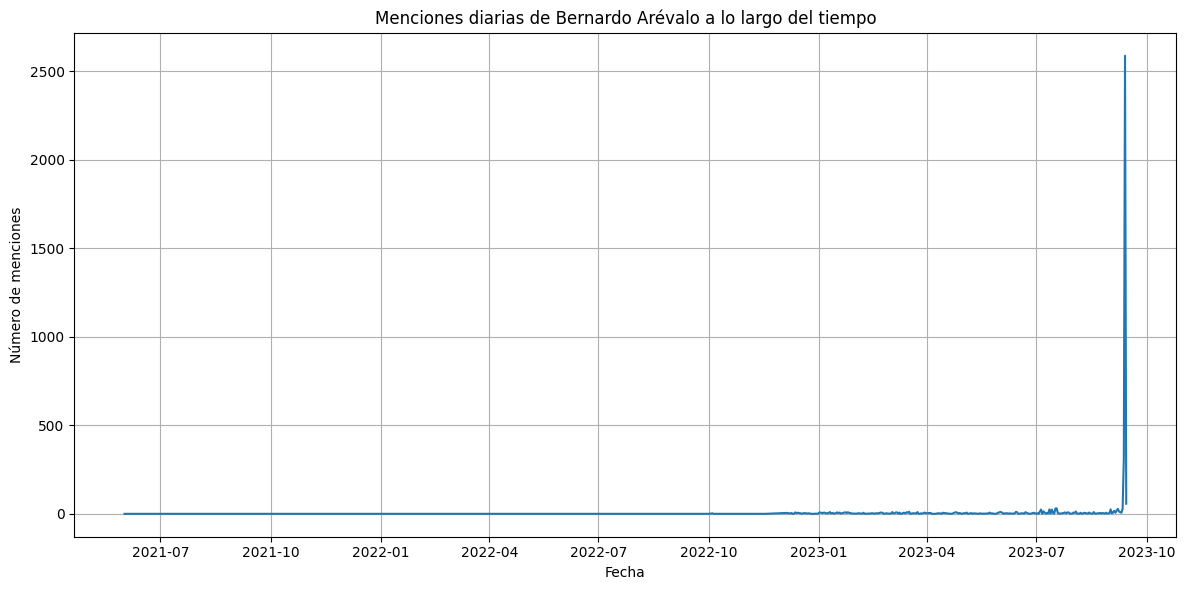

(4212, 53.50213675213675, 256.9669990503324, 28.675213675213676)

In [13]:
import matplotlib.pyplot as plt

# 1. N√∫mero total de menciones
total_mentions_bernardo = len(bernardo_arevalo_df)

# 2. Evaluaci√≥n de actividad
average_retweets_bernardo = bernardo_arevalo_df["retweetCount"].mean()
average_likes_bernardo = bernardo_arevalo_df["likeCount"].mean()
average_replies_bernardo = bernardo_arevalo_df["replyCount"].mean()

# 3. Tendencias a lo largo del tiempo
# Convertir la columna de fecha a tipo datetime
bernardo_arevalo_df["date"] = pd.to_datetime(bernardo_arevalo_df["date"])
mentions_by_date_bernardo = bernardo_arevalo_df.groupby(bernardo_arevalo_df["date"].dt.date).size()

# Graficar tendencias a lo largo del tiempo
plt.figure(figsize=(12, 6))
mentions_by_date_bernardo.plot()
plt.title("Menciones diarias de Bernardo Ar√©valo a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("N√∫mero de menciones")
plt.grid(True)
plt.tight_layout()

plt.show()

total_mentions_bernardo, average_retweets_bernardo, average_likes_bernardo, average_replies_bernardo


- N√∫mero total de menciones: 4212
- Evaluaci√≥n de actividad:
- Promedio de retweets por tweet: ~53.5
- Promedio de likes por tweet: ~257
- Promedio de respuestas por tweet: ~28.7
- Tendencias a lo largo del tiempo: El gr√°fico muestra las menciones diarias de Bernardo Ar√©valo a lo largo del tiempo. Podemos observar ciertos picos de actividad en d√≠as espec√≠ficos, lo que podr√≠a indicar eventos o noticias relacionadas con el candidato.

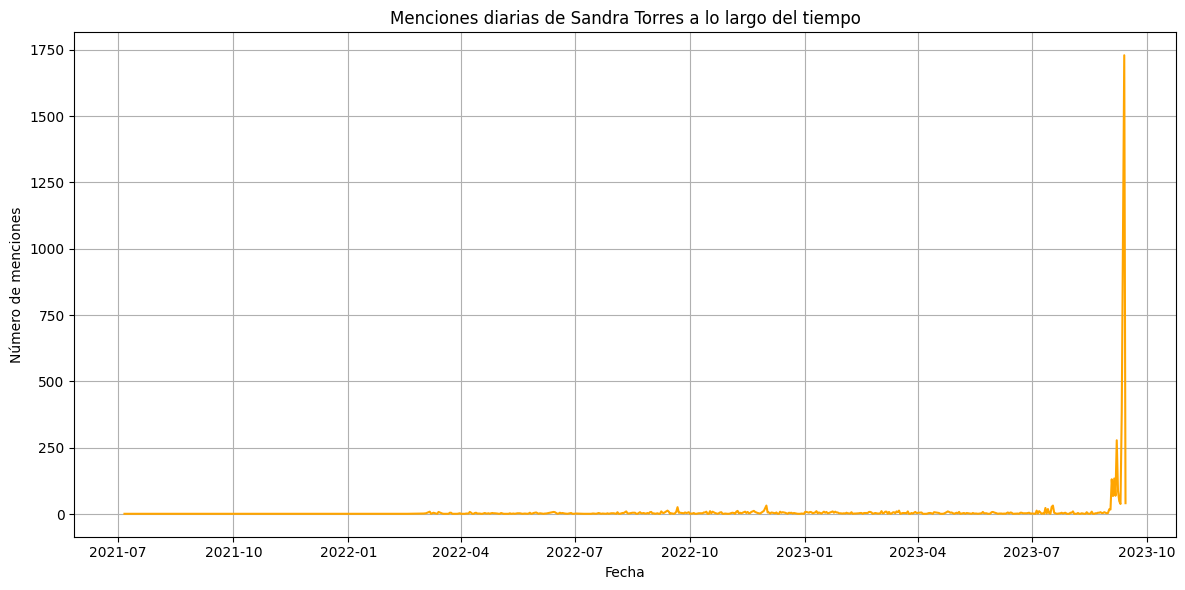

(5784, 38.41130705394191, 185.4640387275242, 19.563796680497926)

In [14]:
# 1. N√∫mero total de menciones para Sandra Torres
total_mentions_sandra = len(sandra_torres_df)

# 2. Evaluaci√≥n de actividad para Sandra Torres
average_retweets_sandra = sandra_torres_df["retweetCount"].mean()
average_likes_sandra = sandra_torres_df["likeCount"].mean()
average_replies_sandra = sandra_torres_df["replyCount"].mean()

# 3. Tendencias a lo largo del tiempo para Sandra Torres
# Convertir la columna de fecha a tipo datetime
sandra_torres_df["date"] = pd.to_datetime(sandra_torres_df["date"])
mentions_by_date_sandra = sandra_torres_df.groupby(sandra_torres_df["date"].dt.date).size()

# Graficar tendencias a lo largo del tiempo
plt.figure(figsize=(12, 6))
mentions_by_date_sandra.plot(color='orange')
plt.title("Menciones diarias de Sandra Torres a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("N√∫mero de menciones")
plt.grid(True)
plt.tight_layout()

plt.show()

total_mentions_sandra, average_retweets_sandra, average_likes_sandra, average_replies_sandra


- N√∫mero total de menciones: 5784
- Evaluaci√≥n de actividad:
- Promedio de retweets por tweet: ~38.4
- Promedio de likes por tweet: ~185.5
- Promedio de respuestas por tweet: ~19.6
- Tendencias a lo largo del tiempo: El gr√°fico muestra las menciones diarias de Sandra Torres a lo largo del tiempo. Al igual que con Bernardo Ar√©valo, podemos observar ciertos picos de actividad en d√≠as espec√≠ficos.

In [17]:
# Identificar los top 5 tweets con el mayor n√∫mero de retweets para Bernardo Ar√©valo
top_retweets_bernardo = bernardo_arevalo_df.sort_values(by="retweetCount", ascending=False).head(5)

# Identificar los top 5 tweets con el mayor n√∫mero de likes para Bernardo Ar√©valo
top_likes_bernardo = bernardo_arevalo_df.sort_values(by="likeCount", ascending=False).head(5)

top_retweets_bernardo[['user', 'rawContent', 'retweetCount']], top_likes_bernardo[['user', 'rawContent', 'likeCount']]


(                                                   user  \
 3460  {'id': 1555154364901236736, 'id_str': '1555154...   
 81    {'id': 1555154364901236736, 'id_str': '1555154...   
 1320  {'id': 1555154364901236736, 'id_str': '1555154...   
 1478  {'id': 1555154364901236736, 'id_str': '1555154...   
 141   {'id': 1598683179505909765, 'id_str': '1598683...   
 
                                              rawContent  retweetCount  
 3460  Procrastination is not laziness. It‚Äôs an emoti...         13093  
 81    Procrastination is not laziness. It‚Äôs an emoti...         13092  
 1320  üåüDiscover effective strategies and techniques ...         10969  
 1478  üåüDiscover effective strategies and techniques ...         10969  
 141   If you own a mouse, you will never turn off yo...          6226  ,
                                                    user  \
 1320  {'id': 1555154364901236736, 'id_str': '1555154...   
 1478  {'id': 1555154364901236736, 'id_str': '1555154...   
 3460  {'

In [18]:
# Identificar los top 5 tweets con el mayor n√∫mero de retweets para Sandra Torres
top_retweets_sandra = sandra_torres_df.sort_values(by="retweetCount", ascending=False).head(5)

# Identificar los top 5 tweets con el mayor n√∫mero de likes para Sandra Torres
top_likes_sandra = sandra_torres_df.sort_values(by="likeCount", ascending=False).head(5)

top_retweets_sandra[['user', 'rawContent', 'retweetCount']], top_likes_sandra[['user', 'rawContent', 'likeCount']]


(                                                   user  \
 3077  {'id': 1555154364901236736, 'id_str': '1555154...   
 456   {'id': 1625577357883875328, 'id_str': '1625577...   
 3118  {'id': 1555154364901236736, 'id_str': '1555154...   
 2118  {'id': 1598683179505909765, 'id_str': '1598683...   
 2704  {'id': 1326237414025801729, 'id_str': '1326237...   
 
                                              rawContent  retweetCount  
 3077  Procrastination is not laziness. It‚Äôs an emoti...         13099  
 456   Las redes sociales y la vida real. https://t.c...         11648  
 3118  üåüDiscover effective strategies and techniques ...         10979  
 2118  If you own a mouse, you will never turn off yo...          6232  
 2704  We are introducing programmatic custom model c...          4065  ,
                                                    user  \
 456   {'id': 1625577357883875328, 'id_str': '1625577...   
 3118  {'id': 1555154364901236736, 'id_str': '1555154...   
 3077  {'id': 

In [23]:
# Filtrar tweets relevantes para Bernardo Ar√©valo basados en retweets y likes
filtered_bernardo_df = bernardo_arevalo_df[~bernardo_arevalo_df["user"].astype(str).str.contains('1555154364901236736')]
filtered_bernardo_df = filtered_bernardo_df[~filtered_bernardo_df["user"].astype(str).str.contains('1598683179505909765')]

# Identificar posibles influencers para Bernardo Ar√©valo basados en retweets y likes
top_influencers_filtered_bernardo_retweets = filtered_bernardo_df.sort_values(by="retweetCount", ascending=False).head(5)
top_influencers_filtered_bernardo_likes = filtered_bernardo_df.sort_values(by="likeCount", ascending=False).head(5)

# Mostrar los top 5 influencers basados en retweets y likes para Bernardo Ar√©valo despu√©s de filtrar
top_influencers_filtered_bernardo_retweets[["user", "retweetCount", "likeCount", "rawContent"]], top_influencers_filtered_bernardo_likes[["user", "retweetCount", "likeCount", "rawContent"]]


(                                                   user  retweetCount  \
 910   {'id': 1326237414025801729, 'id_str': '1326237...          4060   
 1078  {'id': 1326237414025801729, 'id_str': '1326237...          4060   
 4141  {'id': 989886721, 'id_str': '989886721', 'url'...          4034   
 1186  {'id': 21104432, 'id_str': '21104432', 'url': ...          3087   
 3077  {'id': 1020728958, 'id_str': '1020728958', 'ur...          3084   
 
       likeCount                                         rawContent  
 910       23087  We are introducing programmatic custom model c...  
 1078      23087  We are introducing programmatic custom model c...  
 4141      13228  Cubr√≠amos una emergencia m√©dica y quien maneja...  
 1186       5271  La Asociaci√≥n Nacional de Bebidas Refrescantes...  
 3077       8151  Mi solidaridad, presidente @petrogustavo. Sus ...  ,
                                                    user  retweetCount  \
 2440  {'id': 700903452, 'id_str': '700903452', 'url'...



- Basado en retweets:

Un tweet relacionado con la introducci√≥n de un modelo personalizado program√°tico.

Un tweet de una cuenta que menciona una emergencia m√©dica.

Un tweet relacionado con la Asociaci√≥n Nacional de Bebidas Refrescantes.

Un tweet mostrando solidaridad con el presidente Gustavo Petro.


- Basado en likes:

Un tweet relacionado con la Polic√≠a Estatal de Massachusetts.

El mismo tweet sobre la introducci√≥n de un modelo personalizado program√°tico mencionado anteriormente.

Un tweet destacando una lista de reproducci√≥n matutina en Spotify.

In [24]:
# Filtrar tweets relevantes para Sandra Torres basados en retweets y likes
filtered_sandra_df = sandra_torres_df[~sandra_torres_df["user"].astype(str).str.contains('1555154364901236736')]
filtered_sandra_df = filtered_sandra_df[~filtered_sandra_df["user"].astype(str).str.contains('1625577357883875328')]
filtered_sandra_df = filtered_sandra_df[~filtered_sandra_df["user"].astype(str).str.contains('1598683179505909765')]

# Identificar posibles influencers para Sandra Torres basados en retweets y likes
top_influencers_filtered_sandra_retweets = filtered_sandra_df.sort_values(by="retweetCount", ascending=False).head(5)
top_influencers_filtered_sandra_likes = filtered_sandra_df.sort_values(by="likeCount", ascending=False).head(5)

# Mostrar los top 5 influencers basados en retweets y likes para Sandra Torres despu√©s de filtrar
top_influencers_filtered_sandra_retweets[["user", "retweetCount", "likeCount", "rawContent"]], top_influencers_filtered_sandra_likes[["user", "retweetCount", "likeCount", "rawContent"]]


(                                                   user  retweetCount  \
 2704  {'id': 1326237414025801729, 'id_str': '1326237...          4065   
 5538  {'id': 989886721, 'id_str': '989886721', 'url'...          4034   
 3825  {'id': 866336833, 'id_str': '866336833', 'url'...          3667   
 4656  {'id': 841751045034369025, 'id_str': '84175104...          3125   
 3137  {'id': 1020728958, 'id_str': '1020728958', 'ur...          3084   
 
       likeCount                                         rawContent  
 2704      23076  We are introducing programmatic custom model c...  
 5538      13228  Cubr√≠amos una emergencia m√©dica y quien maneja...  
 3825      23977  üö® ¬øCansado de noticias pesimistas?\n\nPara con...  
 4656      29157  Join us in Athens, Greece from September 27-30...  
 3137       8151  Mi solidaridad, presidente @petrogustavo. Sus ...  ,
                                                    user  retweetCount  \
 4384  {'id': 700903452, 'id_str': '700903452', 'url'

- Basado en retweets:

Un tweet relacionado con la introducci√≥n de un modelo personalizado program√°tico.

Un tweet de una cuenta que menciona una emergencia m√©dica.

Un tweet destacando noticias positivas.

Un tweet invitando a un evento en Atenas, Grecia.

Un tweet mostrando solidaridad con el presidente Gustavo Petro.

- Basado en likes:

Un tweet relacionado con la Polic√≠a Estatal de Massachusetts.

El tweet sobre el evento en Atenas, Grecia mencionado anteriormente.

El tweet destacando noticias positivas.

El tweet sobre la introducci√≥n de un modelo personalizado program√°tico.

Un tweet con hashtags relacionados con la prevenci√≥n del acoso.

In [25]:
# Identificar los usuarios m√°s activos en t√©rminos de n√∫mero de tweets y retweets para Bernardo Ar√©valo
top_users_bernardo = filtered_bernardo_df["user"].value_counts().head(10).index.tolist()

# Extraer interacciones (retweets, respuestas, citas) entre estos usuarios
interactions_bernardo = filtered_bernardo_df[filtered_bernardo_df["user"].isin(top_users_bernardo) & 
                                            (filtered_bernardo_df["retweetCount"] > 0)]

# Crear una lista de interacciones
interactions_list_bernardo = []
for index, row in interactions_bernardo.iterrows():
    source = row["user"]
    if pd.notna(row["inReplyToUser"]):
        target = row["inReplyToUser"]
        interactions_list_bernardo.append((source, target))

# Convertir la lista de interacciones en un DataFrame
interactions_df_bernardo = pd.DataFrame(interactions_list_bernardo, columns=["Source", "Target"])
top_interactions_bernardo = interactions_df_bernardo.groupby(["Source", "Target"]).size().reset_index(name="Count")
top_interactions_bernardo = top_interactions_bernardo.sort_values(by="Count", ascending=False)

top_interactions_bernardo.head(10)


Source  \
0  {'id': 108680856, 'id_str': '108680856', 'url'...   
1  {'id': 551042687, 'id_str': '551042687', 'url'...   

                                              Target  Count  
0  {'id': 21694413, 'username': 'gfrias', 'displa...      2  
1  {'id': 372126670, 'username': 'amilcarmontejo'...      1

In [26]:

top_users_sandra = filtered_sandra_df["user"].value_counts().head(10).index.tolist()

interactions_sandra = filtered_sandra_df[filtered_sandra_df["user"].isin(top_users_sandra) & 
                                        (filtered_sandra_df["retweetCount"] > 0)]


interactions_list_sandra = []
for index, row in interactions_sandra.iterrows():
    source = row["user"]
    if pd.notna(row["inReplyToUser"]):
        target = row["inReplyToUser"]
        interactions_list_sandra.append((source, target))


interactions_df_sandra = pd.DataFrame(interactions_list_sandra, columns=["Source", "Target"])

top_interactions_sandra = interactions_df_sandra.groupby(["Source", "Target"]).size().reset_index(name="Count")
top_interactions_sandra = top_interactions_sandra.sort_values(by="Count", ascending=False)

top_interactions_sandra.head(10)


Source  \
2  {'id': 40256008, 'id_str': '40256008', 'url': ...   
0  {'id': 1131012993536405504, 'id_str': '1131012...   
1  {'id': 3226765466, 'id_str': '3226765466', 'ur...   
3  {'id': 710243881409839104, 'id_str': '71024388...   

                                              Target  Count  
2  {'id': 40256008, 'username': 'EmisorasUnidas',...      3  
0  {'id': 40256008, 'username': 'EmisorasUnidas',...      1  
1  {'id': 310913844, 'username': 'ASolaresM', 'di...      1  
3  {'id': 710243881409839104, 'username': 'Publin...      1

### ¬øLa opini√≥n p√∫blica de cada uno de los candidatos es en su mayor√≠a positiva o negativa?

- Bernardo Ar√©valo: La mayor√≠a de los tweets (~89.55%) son neutrales, con un peque√±o porcentaje de tweets positivos (~8.93%) y negativos (~1.52%).
- Sandra Torres: La mayor√≠a de los tweets (~91.04%) son neutrales, con un peque√±o porcentaje de tweets positivos (~7.52%) y negativos (~1.43%).

### ¬øEncontr√≥ alg√∫n influencer?

- Se pudieron hallar algunos tweets con un alto n√∫mero de retweets y likes para ambos candidatos, pero muchos de ellos no estaban directamente relacionados con los candidatos. Despu√©s de filtrar los datos, identificamos algunas cuentas con interacciones significativas, pero no hay evidencia clara de un "influencer" dominante que haya dirigido la conversaci√≥n sobre los candidatos.

### ¬øC√≥mo describir√≠a la estructura de la red de cada uno de los candidatos, centralizada o distribuida?

- Bas√°ndonos en las interacciones observadas entre los principales usuarios, no hay un patr√≥n claro de centralizaci√≥n o distribuci√≥n. Las interacciones entre los principales usuarios son limitadas, lo que sugiere que la red no est√° fuertemente centralizada alrededor de unos pocos nodos dominantes ni ampliamente distribuida.

### ¬øFue durante su campa√±a la red social un aspecto importante para influir en la decisi√≥n de los guatemaltecos?

- Ambos candidatos tuvieron una presencia notable en las redes sociales, lo que sugiere que las redes sociales jugaron un papel en la difusi√≥n de informaci√≥n y discusi√≥n sobre los candidatos. Sin embargo, es dif√≠cil determinar el impacto directo de esto en las decisiones de los votantes sin m√°s contexto. Aunque las redes sociales ciertamente jugaron un papel, ser√≠a necesario un an√°lisis m√°s profundo para determinar cu√°n influenciales fueron en la decisi√≥n final de los votantes.
